# Bike Sharing Assignment 

### Problem Statement:
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.<br> In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.**


### Understanding Business Goal:
To model the demand for shared bikes with the available independent variables. It will be used by them to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations.**

### Key Steps:
* **Data Understanding**
* **Data Preparation**
* **Exploratory Data Anlysis**
* **Model Building**
* **Model Evaulation**
* **Final Conclusion**

In [34]:
"""Importing libraries"""
import os
import warnings
warnings.filterwarnings('ignore')

# Data preparation libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Model building libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score



In [35]:
"""Reading data"""
day = pd.read_csv('day.csv')
print("Reading Data")
day.head()

Reading Data


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [36]:
print("Dimensions of Bikesharing dataset")
print(day.shape)

Dimensions of Bikesharing dataset
(730, 16)


In [37]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [38]:
"""Describe Data"""
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Data Preparation:

In [39]:
"""Convert season column variables with their respective values."""
_=day['season'].replace({1:'spring', 2:'summer', 3:'fall', 4:'winter'}, inplace = True)
day['season'].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [40]:
"""Convert year column variables with their respective values."""
_=day['weathersit'].replace({1:'clear',2:'mist',3: 'light'}, inplace = True)
day['weathersit'].value_counts()

clear    463
mist     246
light     21
Name: weathersit, dtype: int64

In [41]:
"""Convert month column variables with their respective values."""
_ = day.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'}, inplace = True)
day['mnth'].value_counts()

aug     62
may     62
jan     62
jul     62
dec     62
oct     62
mar     62
apr     60
sept    60
jun     60
nov     60
feb     56
Name: mnth, dtype: int64

In [42]:
"""Convert weekday column variables with their respective values."""
_ = day.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'}, inplace = True)
day['weekday'].value_counts()

sun    105
mon    105
sat    105
tue    104
thu    104
fri    104
wed    103
Name: weekday, dtype: int64

In [43]:
"""Count of holidays"""
day.holiday.value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [44]:
"""Check missing values and handle them.."""
print(day.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


Here we can see no missing values in the columns of the Bikesharing dataset

In [45]:
"""Removing extra columns which is not useful for EDA"""
print("We can drop 'instant' column as it signifies record index")
_=day.drop(['instant'], axis = 1, inplace = True)

We can drop 'instant' column as it signifies record index


### Outliers detection

In [46]:
day.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

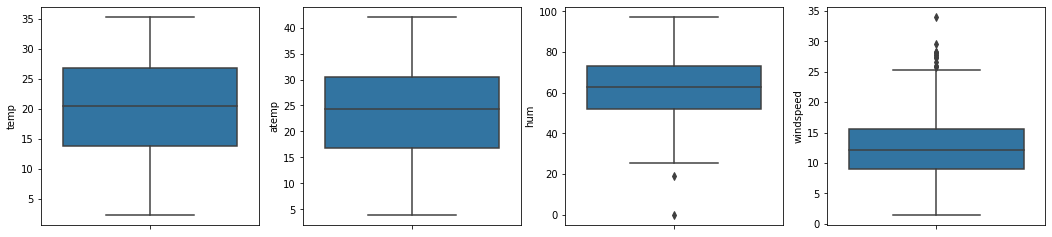

In [47]:
"""we can check the boxplot of the continuous variables"""
cols = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(18,4))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=day)
    i+=1


Here we could not see any outlier in the continuous variables of the bike sharing dataset. So we acn continue our analysis without handling them.

### Explorartory Data Analysis:

<Figure size 1080x2160 with 0 Axes>

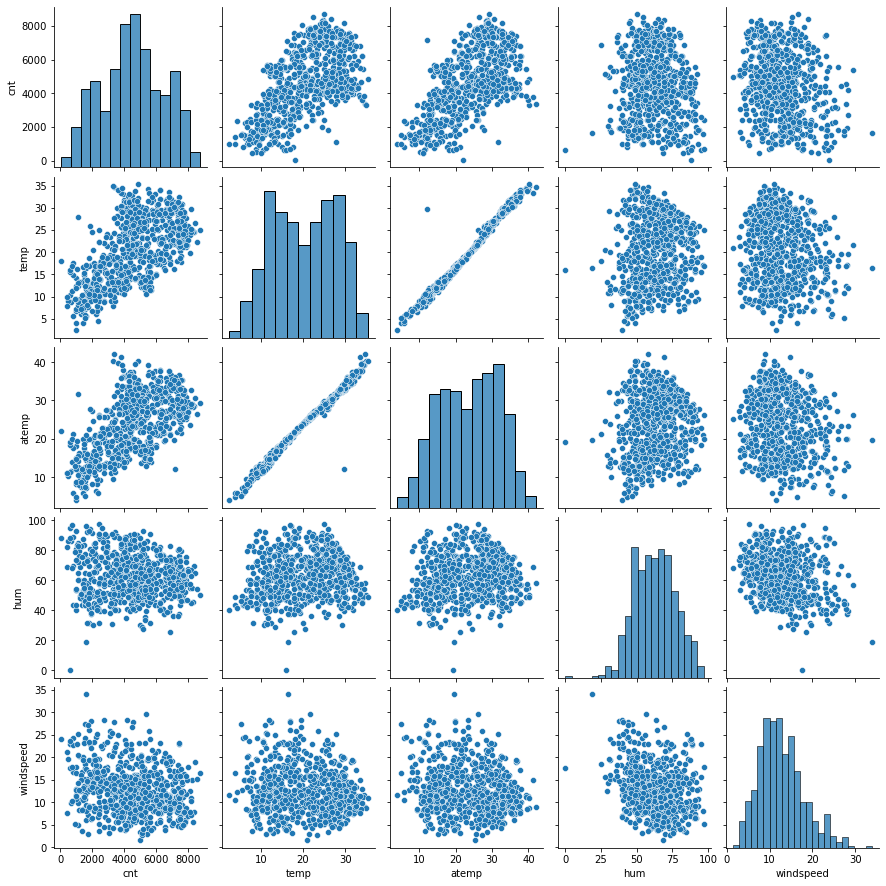

In [48]:
"""Analysing continuous variables with Target variables for bikesharing dataset"""
plt.figure(figsize = (15,30))
sns.pairplot(data=day,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

In [49]:
# """Temp Vs Count of bikes rented"""
# plt.scatter(day['temp'],day['cnt'])
# plt.title('Temp Vs Count of bikes rented')
# plt.xlabel('temp')
# plt.show()

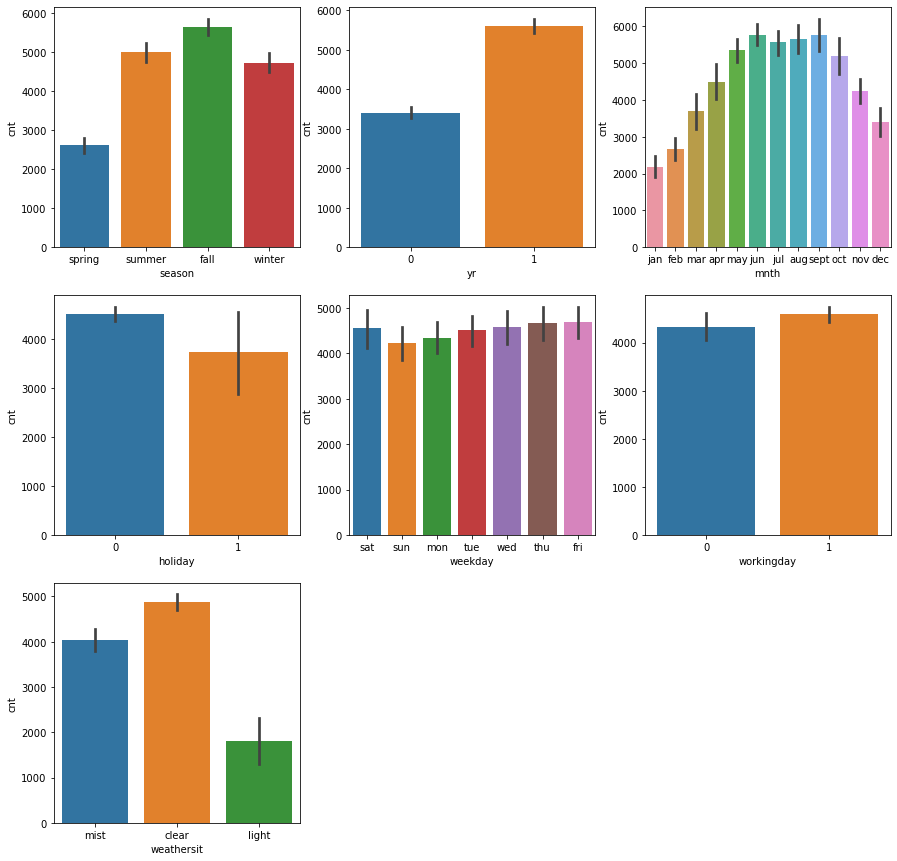

In [50]:
"""Analysing categorical variables with Target variables for bikesharing dataset"""
vars_cat = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(15, 15))
for i in enumerate(vars_cat):
    plt.subplot(3,3,i[0]+1)
    sns.barplot(data=day, x=i[1], y='cnt')
plt.show()

In [51]:
"""Check variables correlation"""
correlation=day.corr()
correlation.style.background_gradient()


,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
yr,1.000000,0.008195,-0.002945,0.048789,0.047215,-0.112547,-0.011624,0.250502,0.596911,0.569728
holiday,0.008195,1.000000,-0.252948,-0.028764,-0.032703,-0.015662,0.006257,0.054055,-0.109142,-0.068764
workingday,-0.002945,-0.252948,1.000000,0.053470,0.052940,0.023202,-0.018666,-0.517607,0.305437,0.062542
temp,0.048789,-0.028764,0.053470,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.047215,-0.032703,0.052940,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,-0.112547,-0.015662,0.023202,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.011624,0.006257,-0.018666,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.250502,0.054055,-0.517607,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.596911,-0.109142,0.305437,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411
cnt,0.569728,-0.068764,0.062542,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000


### Observations from the EDA:
* More bikes are rented when the temp is high.
* In Fall season, bike sharing demand was comparatively more.
* Year 2019 has more records of bike sharing.
* Months june-oct seems for favourable for bike sharing.
* Holidays has more record of bike sharing. That means people choose to rent bike on holidays more.
* Weekdays has more count of bike share. This signifies that, may be people use to take rental bikes to reach out to their work places.


### Data preparation for model

Drop one of the highly correlated variables as to avoid.
* In our case, atemp and temp has very correlation, so we can safely drop atemp variable. 
* Variables casual, regsitered


In [52]:
day.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [53]:
_=day.drop(['atemp'], axis = 1, inplace=True)
_ = day.drop(['dteday'], axis = 1 , inplace = True)
_ = day.drop(['casual'], axis = 1 , inplace = True)
_ = day.drop(['registered'], axis = 1 , inplace = True)

### Model building: Multi-Linear Model

In [54]:
"""Creating dummy variables from some specific variables"""
day = pd.get_dummies(data=day,columns=["season","mnth","weekday"],drop_first=True)
day = pd.get_dummies(data=day,columns=["weathersit"])

In [55]:
"""split data into train and test with 70:30"""
train_data, test_data = train_test_split(day, train_size=0.7, random_state=10)

In [56]:
print(train_data.shape)
print(test_data.shape)

(510, 30)
(220, 30)


Now that we have train and test sets divided in a ratio of 7:3, we can now scale the values of continuous variables.

### Rescaling Features:
We can rescale features by using following methods:
* MinMax scaling
* Standardization

Here, we can rescale using MinMaxScalar

In [57]:
vars_to_scale = ['temp','hum','windspeed']
scaler = MinMaxScaler()

train_data[vars_to_scale] = scaler.fit_transform(train_data[vars_to_scale])

In [58]:
train_data.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_clear,weathersit_light,weathersit_mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.033333,0.690196,0.513354,0.563841,0.342904,4506.237255,0.247059,0.256863,0.260784,...,0.092157,0.147059,0.147059,0.129412,0.137255,0.149020,0.152941,0.621569,0.033333,0.345098
std,0.500429,0.179682,0.462867,0.233194,0.183851,0.162760,1956.409777,0.431725,0.437332,0.439494,...,0.289531,0.354512,0.354512,0.335985,0.344454,0.356457,0.360284,0.485472,0.179682,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,431.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.314983,0.426048,0.225964,3126.750000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.506613,0.562400,0.322431,4497.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.721686,0.697621,0.434281,6028.750000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8714.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [59]:
train_data.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_clear', 'weathersit_light',
       'weathersit_mist'],
      dtype='object')

After rescaling, we can see the variables ranging between 0-1.

Now we can proceed further variables selection using some feature selection algorithm.

### Feature Selection using RFE (Recursive Feature Elimination)

In [60]:
X_train = train_data
y_train = train_data.pop('cnt')

lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

We will randomly select 15 variables for selection using RFE.

In [61]:
rfe = RFE(lr, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

Variables selected by the RFE are as follows:

In [62]:
rfe_df = pd.DataFrame({'Predictor': X_train.columns, 'Status': rfe.support_, 'Ranking': rfe.ranking_})
rfe_df.sort_values(by='Ranking')

,Predictor,Status,Ranking
0,yr,True,1
27,weathersit_light,True,1
13,mnth_jul,True,1
12,mnth_jan,True,1
11,mnth_feb,True,1
10,mnth_dec,True,1
19,mnth_sept,True,1
8,season_winter,True,1
6,season_spring,True,1
5,windspeed,True,1


The variables **selected** by the RFE are as follows:

In [63]:
ref_vars=list(X_train.columns[rfe.support_])
ref_vars

['yr',
 'holiday',
 'temp',
 'hum',
 'windspeed',
 'season_spring',
 'season_winter',
 'mnth_dec',
 'mnth_feb',
 'mnth_jan',
 'mnth_jul',
 'mnth_nov',
 'mnth_sept',
 'weathersit_clear',
 'weathersit_light']

We have above variables selected using automated approach, now we can use manual approach to eliminate further more variables. 

In [64]:
"""Filter subset from the dataset having rfe selected variables"""
X_train_rfe = X_train[ref_vars]
X_train_rfe.shape

(510, 15)

In [65]:
"""Some useful functions"""
def build_lm_model(df):
    train_sm = sm.add_constant(df)
    lm = sm.OLS(y_train, train_sm).fit()
    print(lm.summary())
    return lm

def check_VIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(len(X_train_rfe.columns))]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))
    return vif

### Build statsmodel of Linear Regression Model with all the variables selected by RFE

### Model 1

In [67]:
build_lm_model(X_train_rfe)
vif = check_VIF(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     181.5
Date:                Tue, 10 May 2022   Prob (F-statistic):          7.66e-190
Time:                        16:35:42   Log-Likelihood:                -4110.6
No. Observations:                 510   AIC:                             8253.
Df Residuals:                     494   BIC:                             8321.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             3016.0736    271.447  

### Model 2

In [68]:
"""Drop mnth_feb variable from the data"""

X_train_rfe= X_train_rfe.drop(['mnth_feb'],axis = 1)

build_lm_model(X_train_rfe)
vif= check_VIF(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     191.8
Date:                Tue, 10 May 2022   Prob (F-statistic):          1.40e-189
Time:                        16:35:42   Log-Likelihood:                -4114.0
No. Observations:                 510   AIC:                             8258.
Df Residuals:                     495   BIC:                             8322.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             2948.9032    271.694  

### Model 3

In [69]:
"""Drop mnth_jan variable from the data"""

X_train_rfe= X_train_rfe.drop(['mnth_jan'],axis = 1)
build_lm_model(X_train_rfe)
vif = check_VIF(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.5
Date:                Tue, 10 May 2022   Prob (F-statistic):          3.35e-189
Time:                        16:35:42   Log-Likelihood:                -4117.7
No. Observations:                 510   AIC:                             8263.
Df Residuals:                     496   BIC:                             8323.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             2860.3164    271.356  

### Model 4

In [70]:
"""Drop hum variable from the data"""

X_train_rfe= X_train_rfe.drop(['hum'],axis = 1)
build_lm_model(X_train_rfe)
vif = check_VIF(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     209.2
Date:                Tue, 10 May 2022   Prob (F-statistic):          1.83e-185
Time:                        16:35:42   Log-Likelihood:                -4129.4
No. Observations:                 510   AIC:                             8285.
Df Residuals:                     497   BIC:                             8340.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1970.9443    203.333  

### Model 5

In [71]:
"""Drop temp variable from the data"""

X_train_rfe= X_train_rfe.drop(['temp'],axis = 1)
build_lm_model(X_train_rfe)
vif = check_VIF(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     163.3
Date:                Tue, 10 May 2022   Prob (F-statistic):          2.70e-157
Time:                        16:35:42   Log-Likelihood:                -4198.9
No. Observations:                 510   AIC:                             8422.
Df Residuals:                     498   BIC:                             8473.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             4056.2811    132.667  

### Model 6

In [72]:
"""Drop season_winter variable from the data"""

X_train_rfe= X_train_rfe.drop(['season_winter'],axis = 1)
build_lm_model(X_train_rfe)
vif = check_VIF(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     179.0
Date:                Tue, 10 May 2022   Prob (F-statistic):          5.46e-158
Time:                        16:35:42   Log-Likelihood:                -4199.9
No. Observations:                 510   AIC:                             8422.
Df Residuals:                     499   BIC:                             8468.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             4112.8092    126.816  

### Model 7

In [73]:
"""Drop mnth_jul variable from the data"""

X_train_rfe= X_train_rfe.drop(['mnth_jul'],axis = 1)
build_lm_model(X_train_rfe)
vif = check_VIF(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     198.8
Date:                Tue, 10 May 2022   Prob (F-statistic):          6.08e-159
Time:                        16:35:42   Log-Likelihood:                -4200.4
No. Observations:                 510   AIC:                             8421.
Df Residuals:                     500   BIC:                             8463.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             4137.9706    124.202  

### Inference:
* By applying the elimination approach, we can now have all the variables suitable for our analysis.
* We can see, the p-value of all the above variables are less than 0.005 and the VIF is less than 0.5. 
* Thus we can conclude that now we dont have any insginificant variable and no such multicollinearity exists in our analysis.

### Build Scikit learn model of Linear Regression with final variables selected by RFE

In [74]:
lr1 = LinearRegression()
lr1.fit(X_train_rfe,y_train)

LinearRegression()

In [75]:
print("Intercept : ",lr1.intercept_)

print("Coefficient : ",lr1.coef_)

Intercept :  4137.970572501887
Coefficient :  [ 2191.36097577  -677.1686887  -1390.65925572 -2404.24768185
  -755.56493981  -939.97173864   634.30173054   801.7225205
 -1561.88339121]


### Linear Regression model assumptions:

In [76]:
y_train_pred = lr1.predict(X_train_rfe)

In [77]:
"""Check r2 score for the predicted values"""
r2_score(y_train,y_train_pred)

0.7815937223147218

### Normality of the residuals

Text(0.5, 0, 'Errors')

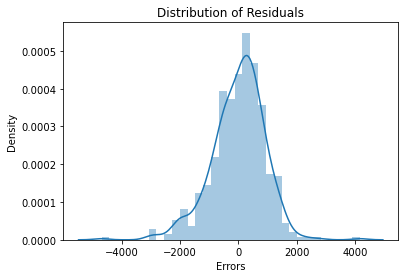

In [78]:
residuals = y_train-y_train_pred
sns.distplot(residuals)
plt.title('Distribution of Residuals')
plt.xlabel('Errors')

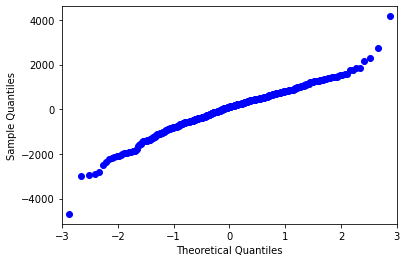

In [79]:
sm.qqplot(residuals)
plt.show()

**Inference:**
* In the above 2 graphs, we can see that the residuals are normally distributed.
* QQ-plot also shows that the residuals forms a straight line.

### Checking for homoscedasticity

Text(0, 0.5, 'y_train_pred')

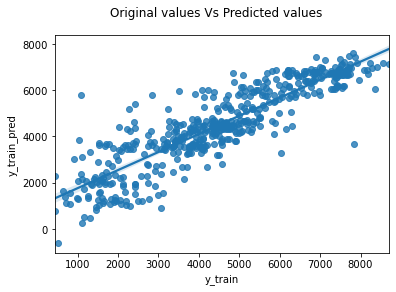

In [80]:
fig = plt.figure()
sns.regplot(y_train, y_train_pred)
fig.suptitle('Original values Vs Predicted values')              
plt.xlabel('y_train')                          
plt.ylabel('y_train_pred')

**Inference:**
* Homoscedasticity in a model means that the error is constant along the values of the dependent variable.
* In above graphs, we can see datapoints concertration being constant across the prediction line.

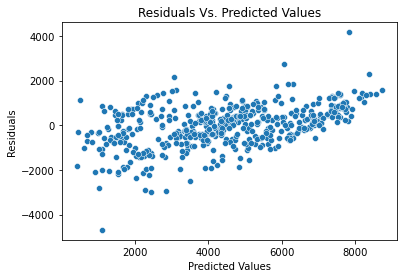

In [81]:
sns.scatterplot(x=y_train, y=residuals)
plt.title('Residuals Vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

### Error terms are uncorrelated with each other

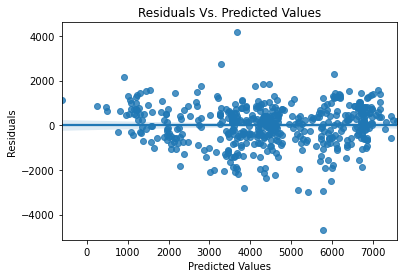

In [82]:
sns.regplot(x=y_train_pred, y=residuals)
plt.title('Residuals Vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

**Inference:**
* In above graphs, we can clearly see that there is no as such relation between residuals and predicted values.

### Multicorrelation

In [83]:
final_rfe=check_VIF(X_train_rfe)

           Features   VIF
2         windspeed  3.12
7  weathersit_clear  2.26
0                yr  1.82
3     season_spring  1.48
5          mnth_nov  1.17
6         mnth_sept  1.12
8  weathersit_light  1.12
4          mnth_dec  1.10
1           holiday  1.05


The variables above has variance inflation factor less than 0.5, therefore we can say all these variables do not have multicorrelation.

### Model Predictions

In [84]:
test_data[vars_to_scale] = scaler.transform(test_data[vars_to_scale])
test_data.head(10)

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_clear,weathersit_light,weathersit_mist
566,1,0,0,0.652175,0.863516,0.393568,4459,0,0,0,...,0,0,1,0,0,0,0,0,1,0
374,1,0,1,0.276477,0.584521,0.340487,3598,1,0,0,...,0,0,0,0,0,1,0,1,0,0
181,0,0,1,0.817910,0.265533,0.165370,5362,0,0,0,...,0,0,0,0,0,0,0,1,0,0
529,1,0,1,0.720868,0.486457,0.476922,7363,0,1,0,...,0,0,0,0,1,0,0,1,0,0
233,0,0,1,0.777567,0.359532,0.524373,4758,0,0,0,...,0,1,0,0,0,0,0,1,0,0
497,1,0,0,0.673983,0.494955,0.417929,6118,0,1,0,...,0,0,0,1,0,0,0,1,0,0
628,1,0,1,0.656538,0.612852,0.271790,8167,0,0,0,...,1,0,0,0,0,0,0,1,0,0
417,1,0,1,0.390490,0.484334,0.437213,4773,1,0,0,...,0,0,0,0,0,0,1,1,0,0
64,0,0,0,0.365223,0.969106,0.661543,605,1,0,0,...,0,0,0,1,0,0,0,0,0,1
163,0,0,1,0.703422,0.390865,0.583333,5020,0,1,0,...,0,1,0,0,0,0,0,1,0,0


In [85]:
print("Print dimensions of Test data: ",test_data.shape)

Print dimensions of Test data:  (220, 30)


In [86]:
X_test = test_data[X_train_rfe.columns]
y_test = test_data.pop('cnt')
X_test.shape

(220, 9)

#### Predict values of Test(Unseen) data

In [87]:
y_test_pred = lr1.predict(X_test)

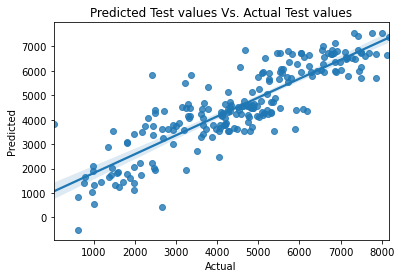

In [88]:
corr_plot = sns.regplot(x=y_test, y=y_test_pred)
plt.title('Predicted Test values Vs. Actual Test values')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

Predicted values on test data and the actual values of test data follows a linear relation.

#### Identify Error patterns in the data


Text(0, 0.5, 'Residuals/errors')

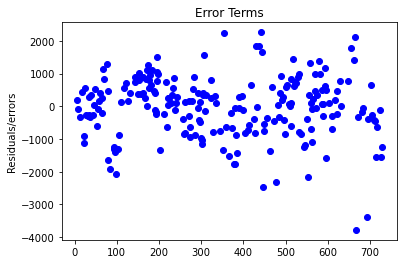

In [89]:
test_residuals = y_test- y_test_pred
plt.plot(test_residuals, color="blue", marker='o', linewidth=2.5, linestyle="")
plt.title('Error Terms')              
plt.ylabel('Residuals/errors')  

**Inference**
* Here we can see **no** such pattern in the error points. 
* This means the points are randomised and therefore we can conclude that our model is performing well on the data and no discrepancies.

### Model Evaluation:
#### Another measure which specifies the goodness of the model is, r-squared value for both the train and test datasets 

In [90]:
print("R-squared value of the model on Train data: ",r2_score(y_train, y_train_pred))
print("R-squared value of the model on Test data: ", r2_score(y_test, y_test_pred))

R-squared value of the model on Train data:  0.7815937223147218
R-squared value of the model on Test data:  0.7563136704487132


Cleary seen, that the r-squared value for both train and test datasets are close enough which signifies that there is no such problem of overfitting or underfitting exists while training the model.

### Conclusions:

The important variables which are or may affect the the growth of the Boombikes are as follows:
* **season_spring** 
* **weathersit_clear**
* **mnth_september**
* **weathersit_light**
* **holiday**
* **windspeed**
* **year**
* **month_december**
* **mnth_november**


### Suggestions:

* The company should expand the business in spring season and in the month of september as clearly with EDA and model we can observe the bike sharing increases that time.
* More bikes were rented on holidays.
* When the weather situation is (Clear, Few clouds, Partly cloudy, Partly cloudy), bike sharing is more.
* Bike sharing is also good when the weather is - Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds